## <span style="color:red">Lab 2: Looping, Conditional statements, Functions</span>

The beauty of Python is that it can be used to convey any idea that you can express precisely. In fact, once you have mastered these tools, you may find that it is much easier to express your thoughts because natural languages are full of ambiguities.

### Conditional Statements: if, elif, else
![](image1.jpeg)

If you have used IFTTT, then you already understand the concept of conditionals:
#### If *this* is true, then do *that*

To see this in action, read the following code. Run it, and then write comments telling me what each line of code is doing. Note the significance of each part of the **np.random.rand()** function.

In [1]:
import numpy as np
x = np.random.rand()
# Answer: 

if x<0.5:
    print('The number', x , 'is less than 0.5')
    # Answer:
else:
    print('The number', x , 'is more than 0.5')
    # Answer:

The number 0.4730296936344466 is less than 0.5


Let's say that you have three outcomes: result1, result2 and result3. You can use the following syntax:
    
    if condition1 is true:
        result1
        
    elif condition2 true:
        result2
        
    else:
        result3
        
Note: You can use the **pass** command to move on to the next condition without doing anything.

Try this out yourself: the first line of code will return a random integer between 0 and 9. Use if, elif, and else to return the words result1, result2, and result3 respectively if the value is less than or equal to 3, between 4 and 6, or greater than 7.

In [2]:
randNum = np.random.randint(0,10)
# put your if, elif, and else statements here

### Looping: Part 1

One of the best parts of computer programming is getting the computer to do boring, repetitive work so that you don't have to! Let's say that you have a calculation that you need to do a certain number of time, like processing a set of 25 neurons, or if you have an EEG recording from 16 participants, a for-loop will execute any specified code a certain number of times.

For example: If you wanted to write a for-loop to count from 0 to 4, you could do the following:

    for i in range(5):
        print(i)
        
Where:
- **_for_** initiates the loop
- **_i_** is the variable assigned a value in the range between 0 and 4
- **_in_** is the function which assigns **_i_** to a value in **_range(5)_**
- **_range(5)_** returns an integer between 0 and 4 according to how many times the for-loop has iterated.
- **_print(i)_** prints the value of **_i_** because it is idented following the **for** command, indicating that it should be executed

Pretty simple when you break it down right!?

Let's try another example:

In the cell below, write a for-loop that calculates and prints the square of each item in a list.

In [16]:
numList = [1,2,3,4,5]
# Your loop here

#### Now let's try something a little bit harder!

### Using loops to solve differential equations numerically

Because computers are very good at doing lots of boring calculations, we can use them to accurately approximate solutions to differential equiations. This is essential when the numerical solutions do not yet exist (such as in the Hodgkin & Huxley equations that we will see soon), but are also broadly helpful.

Here, we will learn one such numerical method, **Euler's method**. It is the oldest and pretty simple, but as we will see in this tutorial, not always the most accurate.

Let's start by implementing a solution by hand so that we understand what this method is doing. Consider a very simple example:

\begin{equation*}
\frac{dy}{dx} = y
\end{equation*}

With an initial condition of $y(0) = 1$. if you were to solve this equation analytically, you would find that it is $e^x$.

What Euler's method does is assume that the slope of the function remains linear between any change in input. In other words, since our initial $y$ value is 1, it will assume a constant slope of 1 within some range of $x$. For this example, let's assume that range is 1.

The Euler solution to a differential equation is:

\begin{equation*}
y_{+1} = y_{n} + \Delta x * f(x_{n},y_{n})
\end{equation*}

In this differential equation, the function $f$ is defined by $f(x,y) = y$

We can therefore express our starting condition as:

\begin{equation*}
f(x_{0},y_{0}) = f(0,1) = 1 
\end{equation*} 

In order to find the next value of $y$, we need to multipy the current $y$ by the change in $x$:

\begin{equation*}
\Delta x * f(y_{0}) = 1 * 1 = 1
\end{equation*}

This is like saying that from $x=0$ until $x=1$, we have a constant slope of 1.

Putting it all together:

\begin{equation*}
y_{1} = y_{0} + \Delta x * f(x_{0},y_{0})
\end{equation*}

\begin{equation*}
= 1 + 1 * 1 = 2
\end{equation*}

Repeat the above steps to find the Euler solution for $y^2$, $y^3$, and $y^4$.

In [16]:
# x_n      y_n     f(x_n,y_n)      y_n+1
# 0         1       1              2
# 1         2       2              4
# 2         4       4              8
# 3         8       8              16

Let's see how close this is to the analytical solution. Because we are going to be doing some calculations with them, we can import the *numpy* package and store those values in an array. 

Import the **_numpy_** package and make a 1-dimensional array of the values you calculated above, and call it yHat. 

In [5]:
# Your code here

Now you are going to need to create an array of the first 4 values of the analytical solution: $y = e^x$

The **_numpy_** package has an **_exp(x)_** function which returns the value of $e^x$. This function can also work with a vector of numbers as well, returning $e^x$ for each element.

Create an x vector with the values 0 through 3, and use **_np.exp()_** to save the calculated values in a vector y.

In [6]:
# Your code here

Let's see how good the Euler method actually is. We can express this in terms of mean squared error (MSE). This is the average of the sum of squared differencess between y and yHat:

\begin{equation*}
MSE = \frac{1}{n}\sum_{i=1}^n (y_i-yHat_i)^2
\end{equation*}

In [ ]:
# Your code here

When done correctly, your MSE should be approximately 39.5. Not so great, right? If you look at the differences between y and yHat, you'll see that the error grows larger with each point. This implies that reducing the step size should also reduce the error. Let's try reducing the change in x to 0.5.

In [21]:
# x_n      y_n     f(x_n,y_n)      y_n+1
# 0         1       1              1.5
# 0.5       1.5     1.5            2.25
# 1         2.25    2.25           5
# 1.5       5       5              7.5
# 2         7.5     7.5            11.25
# 2.5       11.25   11.25          16.875
# 3         16.875  16.875         25.3125

Now, let's calculate the MSE. Note that we'll have to redefine y, and yHat as they are now larger arrays. 

Hint: $\Delta x$ is now 0.5, but the range function can only step up in intervals. Use **_np.arange(x, y, z)_** to create an array where x is the lower value, y is the upper value, and z is the step between them. Call this x.

In [7]:
# your code here

In [9]:
# Redefine yHat and calculate the y vector

Now, let's calculate the MSE. If done correctly, your new MSE should be 1.67

In [10]:
# Your code here

Let's use another example with a different differential equation:

\begin{equation*}
\frac{dy}{dx} = -2y
\end{equation*}

Where $y(0) = 3$.

The analytical solution to this equation is:

\begin{equation*}
y(x) = 3e^{-2x}
\end{equation*}

Write for-loop that will calculate the analytical solution for each value in the given x vector and plot it as a point on a graph.

Hint: 
- You will need to import the matplotlib library because you will be plotting.
- You will need to index each element of the x vector in the loop

In [15]:
import matplotlib.pyplot as plt
x = np.arange(0,3,.1)
plt.figure()
# Your code

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

#### Well done! You just used a for-loop to do a bunch of calculations for you and all you had to do what give it the right instructions.

Let's move onto something new:

In python the “%” has two different uses. When used in a math problem, it is used to represent modulus. The modulus of a number is the remainder left when you divide two numbers. Because of this, it can be used to determine if one number is a factor of another.

In the cell below, fill in the template to create a loop which prints what numbers x is divisible by:

In [29]:
x = 8

for i in range(2,x):
    if :
        print('The number', , 'is divisible by', )
    else:
        print('The number', , 'is not divisible by', )

The number 8 is divisible by 2
The number 8 is not divisible by 3
The number 8 is divisible by 4
The number 8 is not divisible by 5
The number 8 is not divisible by 6
The number 8 is not divisible by 7


Right now, the code is not especially useful. We can easily change it into a script that can tell you whether or not a number is prime. In the space below, alter the code in the following ways:
- Rather than printing out a statement at each step of the loop, have a single statement printed at the end that reads "The number X is a prime number" or "The number X is not a prime number" as appropriate.


- In order to find out whether any factors have been found, create a variable that is initialized to be 0, but changes its value to 1 if a factor has been found.


- In order to test your code completely, test it with x values of both 11 and 8.

In [18]:
# Your code here

Assessing whether or not a number is prime, especially using the algorithim above, is not very efficient. (Fun fact: nearly all of computer security and encryption is based on this fact!) You can test this for yourself by using your code to determine if 100992929 is a prime number.

In [20]:
from time import time
t0 = time()
x = 100992929

# Your code here

t1 = time()
print('RunTime: ',t1-t0)

The number 100992929 is prime!
RunTime:  35.01932668685913


One way of improving the efficiency of the code, is to stop once it has found a factor. The **_break_** statement will stop a for-loop once a condition is met. Try your code with the number 100992920, and add a break once a first factor is found. Using **time()**, write a comment about the % decrease in runtime your program now has.

In [22]:
from time import time
t0 = time()
x = 100992929

# Your code here

t1 = time()
print('RunTime: ',t1-t0)
# Answer:

Let's now modify the code more extensively. Use what you currently know to write a program that will print out the first 20 primes numbers. 

Hint: create a variable that counts the number of prime numbers you have found so far.

In [23]:
# your code here

### While loops

Sometimes, we don't know in advnace the number of iterations we will need to perform. Fortunately, there is another kind of loop that will keep computing *while* some logical condition is met. Not surprisingly, it is called a while-loop.

<img src="image2.jpeg" alt="drawing" width="250"/>

Be very careful with while loops - a small slip up can make a loop that will crash your Jupyter Notebook!

Consider the differences between these two loops (do not run either):

    x = 0
    while x < 100:
        x = x + 1

    x = 0
    while x < 100:
        y = x + 1

In the first case, the loop will start at 0 and add 1 to x each time until it reaches 100. In the cell below, write a comment to explain why it will never end.

In [35]:
# your comment here

Now, take the code that you wrote above that returns the first 20 prime numbers and alter it to use a while loop instead of a for loop

In [24]:
# your code here

#### While loops are more general than for-loops and are typicallty used when you don't know how many calculations you need to make.

### Writing your own functions

So far, you have had practice using Python's built-in functions and downloading different packages and using those functions. However, what if you have a really specific problem you want to fix that no package or library can help you with? You make your own! Functions are helpful because they execute a certain piece of code, so you don't have to keep writing it everytime you want to do use it.

Here is an example of how to make an adding function:

    def my_function(parameter1, parameter2):
        total = parameter1 + parameter2
        print(total)
        
Where:
- **_def_** defines the variable as a function.
- ***my_function*** defines the variable.
- **_(parameter1, parameter2)_** are the two parameters that must be passed in the function.
- **_total_** is the variable set to the sum of *paramter1*, and *parameter2*.
- **_print(total)_** prints the value of **_total_**
        
To execute this function, just type ***my_function(a,b)*** where a and b are two numbers you want to add.

In [20]:
def my_function(parameter1, parameter2):
    total = parameter1 + parameter2
    print(total)

my_function(3,7)

10


Create a function which takes three parameters and plots the following equation.

\begin{equation*}
y(x) = \frac{4e^{-3x}}{2}
\end{equation*}

Hint: Your parameters should correspond to the lower limit, upper limit, and the step you want to take

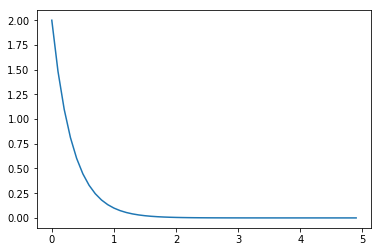

In [21]:
# Try your function with multiple different parameters to see how your graph changes

def plot_function(low,high,step):
    
    x = np.arange(low,high,step)
    y = (4*np.exp(-3*x))/2

    plt.plot(x,y)
    plt.show()

plot_function(0,5,.1)

#### Great job today! 

Don't forget to download and save your notebook in your personal Etna folder! 